In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Equities', 'Foreign') + ['VT', 'ACWI'], 75, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-04-25 to 2019-07-09 - 77


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats

46


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
RSX,47,1.159363,1.768606,0.633087,10.842252,4.174395
EWL,47,0.617647,1.456586,0.396794,5.346392,3.113807
EWA,47,0.588596,1.545589,0.355148,4.506800,3.100777
EFAV,47,0.408116,1.067195,0.345235,3.869322,2.819624
EWZ,47,1.119971,3.617687,0.298613,13.451516,10.630581
VIGI,47,0.399576,1.484401,0.242450,3.622642,4.587566
EPP,47,0.371846,1.685649,0.197054,2.517541,4.599415
EFG,47,0.337723,1.613477,0.184720,2.669207,4.537548
ILF,47,0.461744,2.733866,0.154383,4.835479,9.952474


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:2341: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


evicted EWC 0.885 0.124
evicted EWH 0.881 0.270
evicted DGS 0.785 0.326
evicted HEDJ 0.842 0.160
evicted EFAV 0.808 0.270
evicted INDA 0.522 0.314
evicted EWA 0.651 0.277
evicted EWZ 0.428 0.428
retry backlogs ['VGK', 'IEV', 'CWI', 'VEU', 'VEA', 'IEFA', 'EFA', 'DBEF', 'GSIE', 'VXUS', 'ACWX', 'IDEV', 'IXUS', 'VPL', 'INTF', 'EZU', 'SCHF', 'IEUR', 'ACWI', 'PXH', 'DEM', 'SPDW', 'EFG', 'ILF', 'VSS', 'VYMI', 'EPP', 'VT', 'FNDE', 'RODM', 'HEFA', 'EWJ', 'FEZ', 'EWL', 'EWG', 'IPAC', 'VIGI'] at 0.905/-0.51 - 0.633
evicted FNDE 0.854 0.605
evicted EPP 0.872 0.538
evicted RODM 0.844 0.432
evicted EWL 0.819 0.411
evicted ILF 0.585 0.585
retry backlogs ['VXUS', 'VEA', 'EZU', 'ACWX', 'HEFA', 'VT', 'IEFA', 'CWI', 'SCHF', 'IXUS', 'IEV', 'IDEV', 'VGK', 'VEU', 'PXH', 'VPL', 'IEUR', 'EFA', 'INTF', 'GSIE', 'SPDW', 'DEM', 'EWJ', 'VYMI', 'VSS', 'ACWI', 'DBEF', 'IPAC', 'VIGI', 'FEZ', 'EWG', 'EFG'] at 0.910/-0.52 - 0.633
evicted DEM 0.885 0.633
evicted FEZ 0.699 0.699
retry backlogs ['VEA', 'VXUS', 'IEV', 'HEF

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
RSX,47.0,1.159363,1.768606,-3.457943,0.044621,1.195953,2.402487,4.199471,0.633087,10.842252,4.174395
Portfolio,47.0,1.159363,1.768606,-3.457943,0.044621,1.195953,2.402487,4.199471,0.633087,10.842252,4.174395


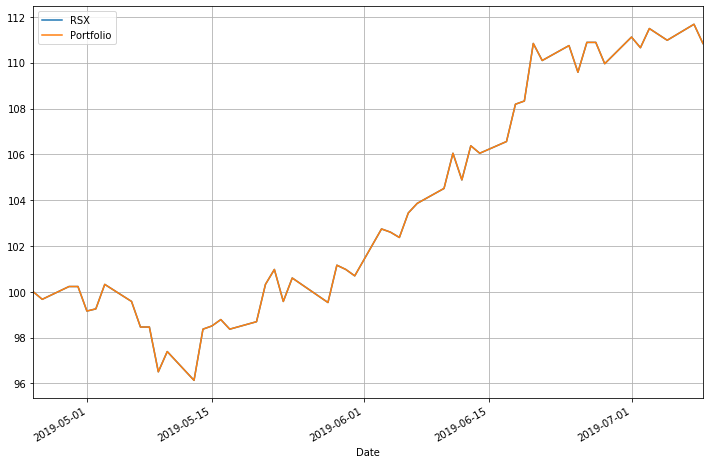

In [4]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(.1)
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)